In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [122]:
# DATA_SOURCE_MAPPING = 'Heart: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download'
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [124]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [125]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


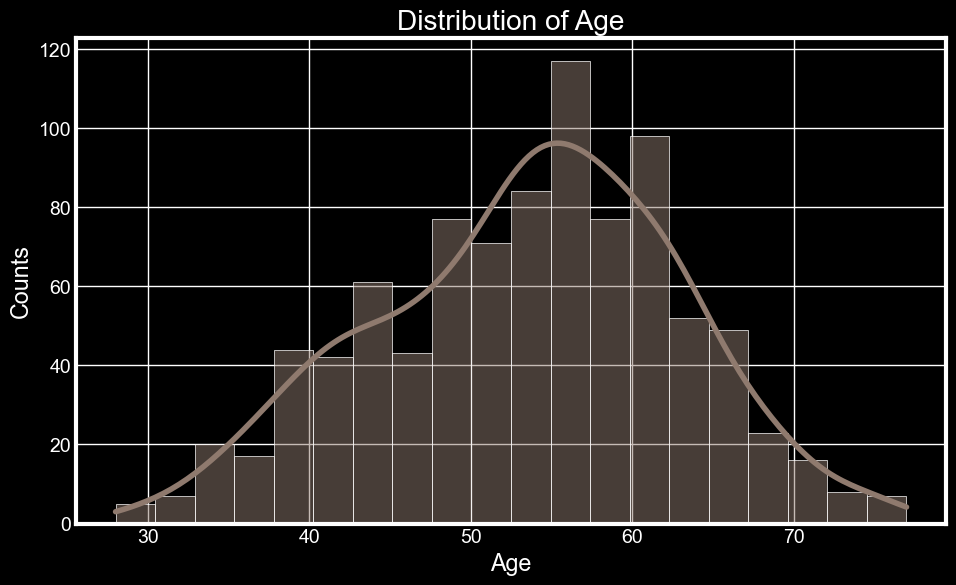

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("darkgrid")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set background colors
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot the histogram with KDE
sns.histplot(df['Age'], kde=True, color='#8F7A6E', bins=20, ax=ax)

# Set labels and title with white color
ax.set_xlabel('Age', color='white')
ax.set_ylabel('Counts', color='white')
ax.set_title('Distribution of Age', color='white')

# Set the color of tick labels
ax.tick_params(axis='both', colors='white')

# Display the plot
plt.show()

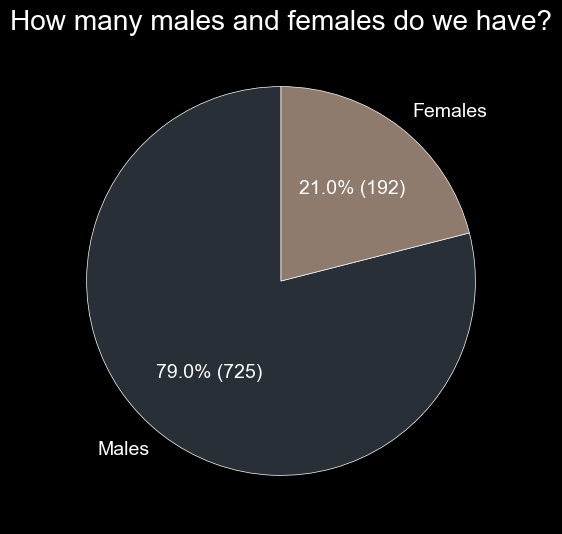

In [127]:
import matplotlib.pyplot as plt

# Hitung jumlah setiap jenis kelamin di DataFrame
sex_counts = df['Sex'].value_counts()

# Tentukan urutan warna (sesuaikan 'colors' sesuai kebutuhan)
colors = ['#292F36', '#8F7A6E']

# Buat figure dan atur background
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')  # Atur background keseluruhan figure
ax.set_facecolor('black')         # Atur background area plot

# Buat pie chart
wedges, texts, autotexts = ax.pie(sex_counts, 
                                  labels=['Males', 'Females'], 
                                  colors=colors, 
                                  autopct=lambda p: f'{p:.1f}% ({int(p*sum(sex_counts)/100)})', 
                                  startangle=90)

# Atur warna teks pada label dan persentase
for text in texts:
    text.set_color('white')          # Warna label
for autotext in autotexts:
    autotext.set_color('white')      # Warna teks persentase

# Setel judul dengan warna putih agar kontras dengan background gelap
ax.set_title("How many males and females do we have?", color='white')

# Tampilkan plot
plt.show()

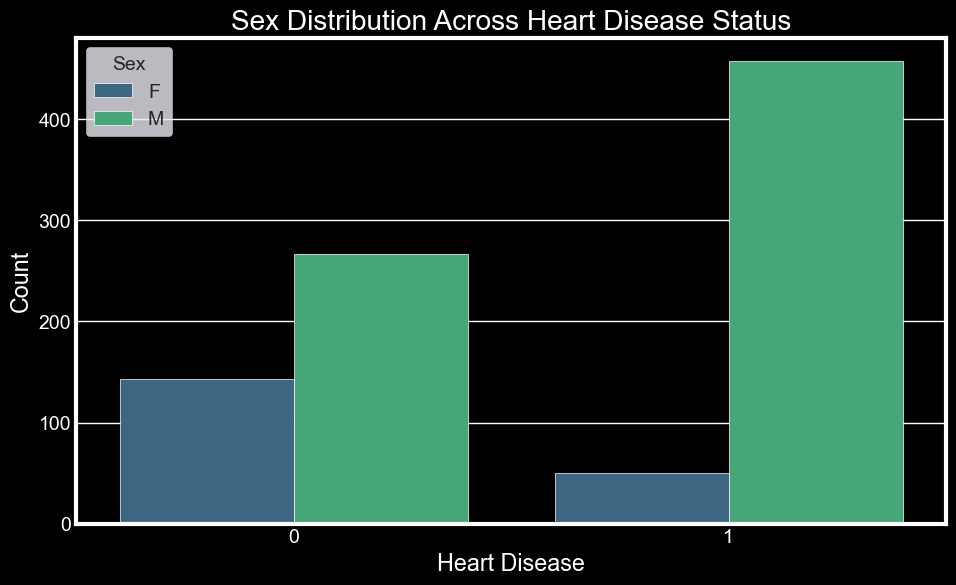

In [128]:
# Grouping the data by 'HeartDisease' and counting the occurrences of 'Sex'
grouped_data = df.groupby(['HeartDisease', 'Sex']).size().reset_index(name='count')

# Create a figure and axis with dark background
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_facecolor('black')  # Set background color for the plot area
plt.gcf().patch.set_facecolor('black')  # Set background color for the figure

# Create the bar plot
sns.barplot(data=grouped_data, x='HeartDisease', y='count', hue='Sex', ax=ax, palette='viridis')

# Adding title and labels with white text for contrast
plt.title("Sex Distribution Across Heart Disease Status", color='white')
plt.xlabel("Heart Disease", color='white')
plt.ylabel("Count", color='white')
ax.tick_params(axis='both', colors='white')  # Change tick colors to white

plt.show()

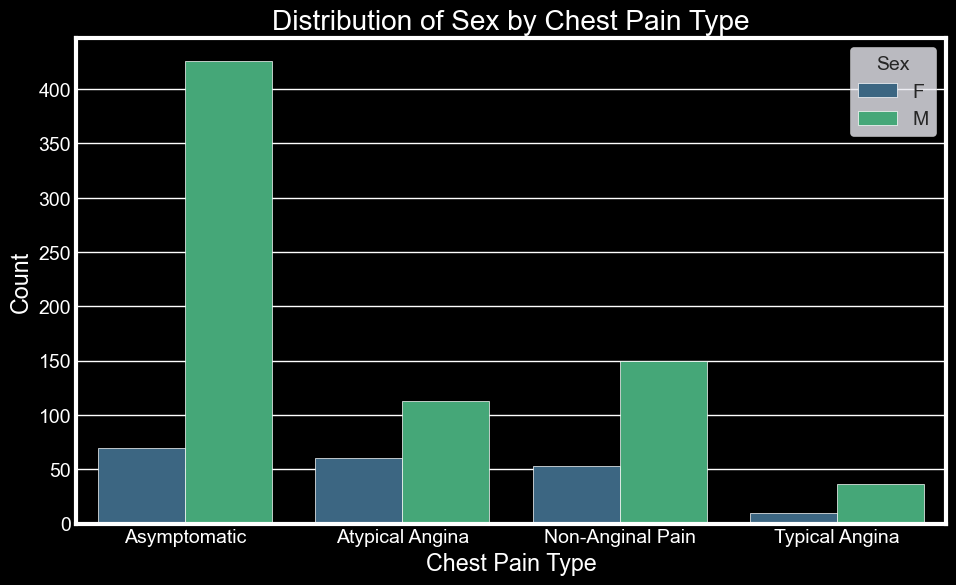

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Changing values to their full forms
df['ChestPainType'] = df['ChestPainType'].replace({
    'ASY': 'Asymptomatic',
    'ATA': 'Atypical Angina',
    'NAP': 'Non-Anginal Pain',
    'TA': 'Typical Angina'
})

# Grouping the data by 'ChestPainType' and counting the occurrences of 'Sex'
grouped_counts = df.groupby(['ChestPainType', 'Sex']).size().reset_index(name='counts')

# Create a figure and axis with dark background
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_facecolor('black')  # Set background color for the plot area
plt.gcf().patch.set_facecolor('black')  # Set background color for the figure

# Create the bar plot
sns.barplot(data=grouped_counts, x='ChestPainType', y='counts', hue='Sex', ax=ax, palette='viridis')

# Adding title and labels with white text for contrast
plt.title("Distribution of Sex by Chest Pain Type", color='white')
plt.xlabel("Chest Pain Type", color='white')
plt.ylabel("Count", color='white')
ax.tick_params(axis='both', colors='white')  # Change tick colors to white

plt.show()

<Axes: >

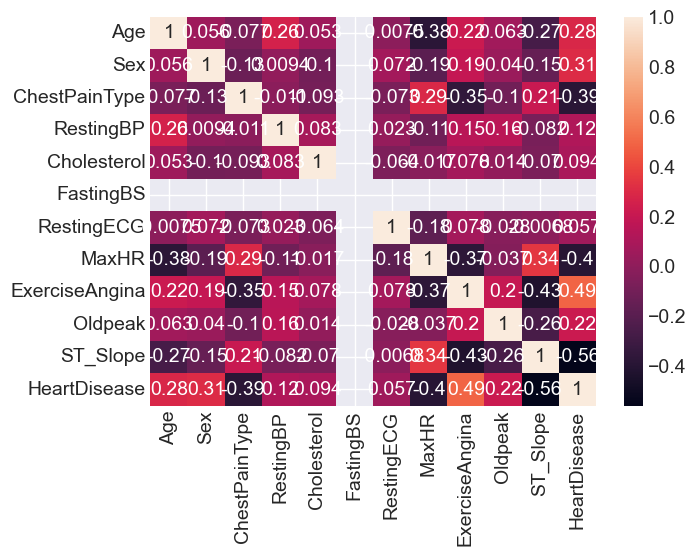

In [156]:
import seaborn as sns

sns.heatmap(df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']].corr(),annot = True)

In [130]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

# Data Pre-Processing

handle missing value

In [131]:
df = df.dropna()

In [132]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [133]:
# How many missing zeros are mising in each feature
feature_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Age ==> Missing zeros : 0
Sex ==> Missing zeros : 0
ChestPainType ==> Missing zeros : 0
RestingBP ==> Missing zeros : 1
Cholesterol ==> Missing zeros : 172
FastingBS ==> Missing zeros : 704
RestingECG ==> Missing zeros : 0
MaxHR ==> Missing zeros : 0
ExerciseAngina ==> Missing zeros : 0
Oldpeak ==> Missing zeros : 368
ST_Slope ==> Missing zeros : 0


In [134]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assume 'df' is your DataFrame and 'feature_columns' is the list of columns you want to process

# Define imputers for numeric and categorical data
numeric_imputer = SimpleImputer(missing_values=0, strategy="mean", copy=False)
categorical_imputer = SimpleImputer(missing_values=0, strategy="most_frequent", copy=False)

# Apply imputers to respective columns
df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']] = numeric_imputer.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])
df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = categorical_imputer.fit_transform(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# Print the number of zeros remaining in each column of interest
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Age ==> Missing zeros : 0
Sex ==> Missing zeros : 0
ChestPainType ==> Missing zeros : 0
RestingBP ==> Missing zeros : 0
Cholesterol ==> Missing zeros : 0
FastingBS ==> Missing zeros : 0
RestingECG ==> Missing zeros : 0
MaxHR ==> Missing zeros : 0
ExerciseAngina ==> Missing zeros : 0
Oldpeak ==> Missing zeros : 0
ST_Slope ==> Missing zeros : 0


Encoding Fitur Kategorikal

In [135]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoders = {}

# Encode fitur kategorikal
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [136]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.00,1,1,140.00,289.00,1.00,1,172.00,0,1.48,2,0
1,49.00,0,2,160.00,180.00,1.00,1,156.00,0,1.00,1,1
2,37.00,1,1,130.00,283.00,1.00,2,98.00,0,1.48,2,0
3,48.00,0,0,138.00,214.00,1.00,1,108.00,1,1.50,1,1
4,54.00,1,2,150.00,195.00,1.00,1,122.00,0,1.48,2,0


In [137]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Lets do some models

Bagging Algorithm

In [141]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Initialize the BaggingClassifier with the corrected parameter name
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=1500, random_state=42)

# Fit the model
bagging_clf.fit(X_train, y_train)

# Evaluate the model (assuming you have a function evaluate defined)
evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[298   0]
 [  0 344]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   298.00 344.00      1.00     642.00        642.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 99  13]
 [ 39 125]]
ACCURACY SCORE:
0.8116
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.72   0.91      0.81       0.81          0.83
recall      0.88   0.76      0.81       0.82          0.81
f1-score    0.79   0.83      0.81       0.81          0.81
support   112.00 164.00      0.81     276.00        276.00


In [142]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[298   0]
 [  0 344]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   298.00 344.00      1.00     642.00        642.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 99  13]
 [ 26 138]]
ACCURACY SCORE:
0.8587
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.91      0.86       0.85          0.86
recall      0.88   0.84      0.86       0.86          0.86
f1-score    0.84   0.88      0.86       0.86          0.86
support   112.00 164.00      0.86     276.00        276.00


In [144]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

Extra Trees

In [145]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[298   0]
 [  0 344]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   298.00 344.00      1.00     642.00        642.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[101  11]
 [ 32 132]]
ACCURACY SCORE:
0.8442
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.76   0.92      0.84       0.84          0.86
recall      0.90   0.80      0.84       0.85          0.84
f1-score    0.82   0.86      0.84       0.84          0.85
support   112.00 164.00      0.84     276.00        276.00


In [146]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

Boosting Algorithm

Ada Boost

In [147]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[255  43]
 [ 37 307]]
ACCURACY SCORE:
0.8754
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.88      0.88       0.88          0.88
recall      0.86   0.89      0.88       0.87          0.88
f1-score    0.86   0.88      0.88       0.87          0.88
support   298.00 344.00      0.88     642.00        642.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[103   9]
 [ 32 132]]
ACCURACY SCORE:
0.8514
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.76   0.94      0.85       0.85          0.87
recall      0.92   0.80      0.85       0.86          0.85
f1-score    0.83   0.87      0.85       0.85          0.85
support   112.00 164.00      0.85     276.00        276.00


/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [148]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

Stochastic Gradien Boosting

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[275  23]
 [ 13 331]]
ACCURACY SCORE:
0.9439
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.94      0.94       0.94          0.94
recall      0.92   0.96      0.94       0.94          0.94
f1-score    0.94   0.95      0.94       0.94          0.94
support   298.00 344.00      0.94     642.00        642.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[101  11]
 [ 31 133]]
ACCURACY SCORE:
0.8478
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.77   0.92      0.85       0.84          0.86
recall      0.90   0.81      0.85       0.86          0.85
f1-score    0.83   0.86      0.85       0.85          0.85
support   112.00 164.00      0.85     276.00        276.00


In [150]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

Voting Ensemble

In [151]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[263  35]
 [ 32 312]]
ACCURACY SCORE:
0.8956
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.90      0.90       0.90          0.90
recall      0.88   0.91      0.90       0.89          0.90
f1-score    0.89   0.90      0.90       0.90          0.90
support   298.00 344.00      0.90     642.00        642.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 95  17]
 [ 34 130]]
ACCURACY SCORE:
0.8152
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.74   0.88      0.82       0.81          0.82
recall      0.85   0.79      0.82       0.82          0.82
f1-score    0.79   0.84      0.82       0.81          0.82
support   112.00 164.00      0.82     276.00        276.00


In [152]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<Axes: >

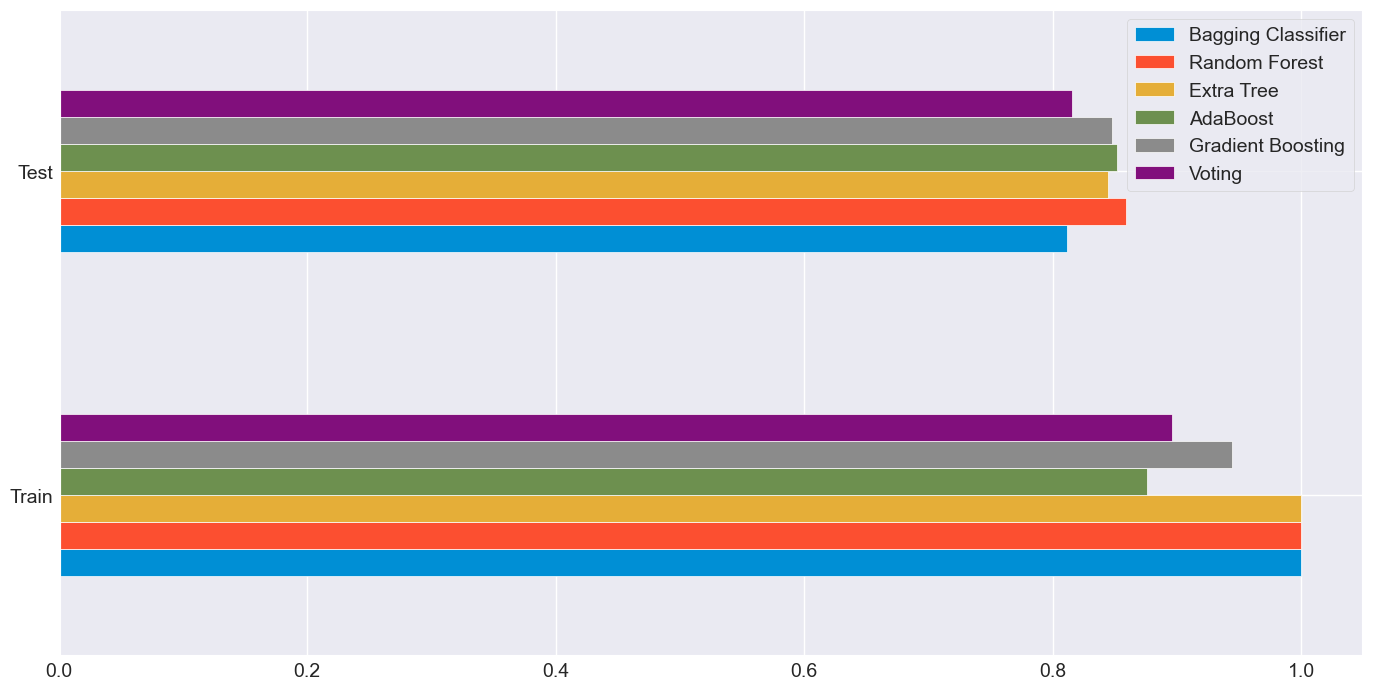

In [153]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [159]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Data preparation (assume X and y are already defined from your dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
bagging = BaggingClassifier()
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()

# Fit and evaluate each model
models = {
    'Bagging': bagging,
    'Random Forest': random_forest,
    'AdaBoost': adaboost,
    'Gradient Boosting': gradient_boosting
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('===============================================')
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} ROC-AUC: {roc_auc_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

# Voting Classifier (combining models)
voting_clf = VotingClassifier(estimators=[
    ('bagging', bagging), 
    ('random_forest', random_forest), 
    ('adaboost', adaboost), 
    ('gradient_boosting', gradient_boosting)], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier ROC-AUC:", roc_auc_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Bagging Accuracy: 0.7934782608695652
Bagging ROC-AUC: 0.8021559233449478
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       112
           1       0.88      0.76      0.81       164

    accuracy                           0.79       276
   macro avg       0.79      0.80      0.79       276
weighted avg       0.81      0.79      0.80       276

Random Forest Accuracy: 0.8695652173913043
Random Forest ROC-AUC: 0.8746733449477353
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       112
           1       0.93      0.85      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

AdaBoost Accuracy: 0.8586956521739131
AdaBoost ROC-AUC: 0.8655270034843205
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       112
    

/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Gradient Boosting Accuracy: 0.8442028985507246
Gradient Boosting ROC-AUC: 0.853331881533101
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       112
           1       0.92      0.80      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.86      0.84      0.85       276

Voting Classifier Accuracy: 0.8405797101449275
Voting Classifier ROC-AUC: 0.8474520905923345
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       112
           1       0.91      0.81      0.86       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
403 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/anaconda3/envs/deep_learning/lib/python3.10/site-packages/sklearn/base.p

In [161]:
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8659420289855072
ROC-AUC: 0.8673780487804879
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       112
           1       0.91      0.86      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



# random forest model is the best for this prediction

In [165]:
model = {'random_forest': random_forest}

In [168]:
from sklearn.preprocessing import LabelEncoder
sex = LabelEncoder()
df['Sex'] = sex.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0])

In [170]:
import pickle 

#saving the model and encoder

data = {"model": model,"Sex": sex }
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)